# Zodiac Sign Predictor

Online dating is now a common trend in many countries across Europe and North America. This dating method is preferred over the traditional form because of many reasons including:

- Secured communication
- Option to scope a plethora of possible dating partners before actually dating
- Meet people from different backgrounds
- etc.

In addition to some of the benefits outlined above, online dating is even made easier through the use of mobile apps for a minimum subscription and free in some platforms. Popular dating platforms like Tinder and Bumble require a monthly fee while OkCupid offers free use of its app.

Using these apps comes with a bit of drawback as they require users to provide some personal details such as gender, sexual orientation, level of education, and sometimes brief essays. As this process can seem daunting, users sometimes fail to disclose some of these information. The apps algorithm perform better at suggesting dating partner when more data is provided by the user.

In the light of the above, this project will employ Machine Learning to predict zodiac signs of users in online dating sites. The data used is from OkCupid, one of the free dating platforms. The names and identities of the users are not provided in the data set.

In order to effectively perform our analysis and run Machine Learning models, the following steps will be implemented:
- Exploratory Data Analysis
- Data Preprocessing
- Machine Learning
- Conclusion

## Exploratory Data Analysis

The below will be performed in this step:
- Load data
- Inspect all columns for data quality issues
- Apply statistical analysis

### Load Data

Import all dependencies for EDA

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

In [36]:
profiles = pd.read_csv('profiles.csv')
print(f"There {len(profiles)} rows in the data")
print(profiles.columns)

There 59946 rows in the data
Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


In [37]:
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neither the dumbest smart guy, or the smartest dumb guy. can't say i\ncan tell the difference. i love to talk about ideas and concepts. i\nforge odd metaphors instead of reciting cliches. like the\nsimularities between a friend of mine's house and an underwater\nsalt mine. my favorite word is salt by the way (weird choice i\nknow). to me most things in life are better as metaphors. i seek to\nmake mysel...","currently working as an international agent for a freight\nforwarding company. import, export, domestic you know the\nworks.<br />\nonline classes and trying to better myself in my free time. perhaps\na hours worth of a good book or a video game on a lazy sunday.","making people laugh.<br />\nranting about a good salting.<br />\nfinding simplicity in complexity, and complexity in simplicity.","the way i look. i am a six foot half asian, half caucasian mutt. it\nmakes it tough not to notice me, and for me to blend in.","books:<br />\nabsurdistan, the republic, of mice and men (only book that made me\nwant to cry), catcher in the rye, the prince.<br />\n<br />\nmovies:<br />\ngladiator, operation valkyrie, the producers, down periscope.<br />\n<br />\nshows:<br />\nthe borgia, arrested development, game of thrones, monty\npython<br />\n<br />\nmusic:<br />\naesop rock, hail mary mallon, george thorogood and the delaware\ndestroyers, felt<br />\n<br />\nfood:<br />\ni'm down for anything.",food.<br />\nwater.<br />\ncell phone.<br />\nshelter.,duality and humorous things,trying to find someone to hang out with. i am down for anything\nexcept a club.,i am new to california and looking for someone to wisper my secrets\nto.,you want to be swept off your feet!<br />\nyou are tired of the norm.<br />\nyou want to catch a coffee or a bite.<br />\nor if you want to talk philosophy.,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1. i am a workaholic.<br />\n2. i love to cook regardless of whether i am at work.<br />\n3. i love to drink and eat foods that are probably really bad for\nme.<br />\n4. i love being around people that resemble line 1-3.<br />\ni love the outdoors and i am an avid skier. if its snowing i will\nbe in tahoe at the very least. i am a very confident and friendly.\ni'm not interested in acting or being a typical guy. i have no time\nor patience for re...,dedicating everyday to being an unbelievable badass.,being silly. having ridiculous amonts of fun wherever. being a\nsmart ass. ohh and i can cook. ;),NaN,i am die hard christopher moore fan. i don't really watch a lot of\ntv unless there is humor involved. i am kind of stuck on 90's\nalternative music. i am pretty much a fan of everything though... i\ndo need to draw a line at most types of electronica.,delicious porkness in all of its glories.<br />\nmy big ass doughboy's sinking into 15 new inches.<br />\nmy overly resilient liver.<br />\na good sharp knife.<br />\nmy ps3... it plays blurays too. ;)<br />\nmy over the top energy and my outlook on life... just give me a bag\nof lemons and see what happens. ;),NaN,NaN,i am very open and will share just about anything.,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,

### Clean the data

Next step in our analysis is to clean the data and transform it to suitable format for exploratory data analysis and ultimately to run machine learning models

#### Check for null values

In [38]:
profiles.isna().any()

age            False
body_type       True
diet            True
drinks          True
drugs           True
education       True
essay0          True
essay1          True
essay2          True
essay3          True
essay4          True
essay5          True
essay6          True
essay7          True
essay8          True
essay9          True
ethnicity       True
height          True
income         False
job             True
last_online    False
location       False
offspring       True
orientation    False
pets            True
religion        True
sex            False
sign            True
smokes          True
speaks          True
status         False
dtype: bool

There are null values in all but seven columns in the data. First, we inspect our target variable **signs**

In [39]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

There are 48890 non null values in **sign**. This signifies we can account for about **82%** of our data. Therefore, all fields will be reduced to the length of **sign** column.

**Drop all null values in **sign****

In [40]:
profiles_df = profiles.dropna(subset=["sign"]).copy()
print(f"There are {len(profiles_df)} in the dataframe")

There are 48890 in the dataframe


**Inspect the labels in sign**

In [41]:
profiles_df['sign'].value_counts()

gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
aquarius but it doesn&rsquo;t matter             1408
libra but it doesn&rsquo;t matter                1408
capricorn and it&rsquo;s fun

Upon inspection, it is evident that labels need to be separated from the rest of the text. Regex expressions would have been a preferred method to extract the labels but in this case, the labels are the first words in the rows(sentences) making it easier to employ list comprehension to slice the first element after the sentence is split.
A new column is created containing extracted labels.

Split each sentence into a list of words

In [42]:
split_signs = profiles_df.apply(lambda label: label['sign'].split(), axis=1)

Extract first element in each list and create new column

In [43]:
profiles_df['labels'] = [x[0] for x in split_signs]

Inspect values and distribution of labels

In [44]:
profiles_df['labels'].value_counts()

leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: labels, dtype: int64

In [46]:
profiles_df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,labels
0,22,a little extra,strictly anything,socially,never,working on college/university,"about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neither the dumbest smart guy, or the smartest dumb guy. can't say i\ncan tell the difference. i love to talk about ideas and concepts. i\nforge odd metaphors instead of reciting cliches. like the\nsimularities between a friend of mine's house and an underwater\nsalt mine. my favorite word is salt by the way (weird choice i\nknow). to me most things in life are better as metaphors. i seek to\nmake mysel...","currently working as an international agent for a freight\nforwarding company. import, export, domestic you know the\nworks.<br />\nonline classes and trying to better myself in my free time. perhaps\na hours worth of a good book or a video game on a lazy sunday.","making people laugh.<br />\nranting about a good salting.<br />\nfinding simplicity in complexity, and complexity in simplicity.","the way i look. i am a six foot half asian, half caucasian mutt. it\nmakes it tough not to notice me, and for me to blend in.","books:<br />\nabsurdistan, the republic, of mice and men (only book that made me\nwant to cry), catcher in the rye, the prince.<br />\n<br />\nmovies:<br />\ngladiator, operation valkyrie, the producers, down periscope.<br />\n<br />\nshows:<br />\nthe borgia, arrested development, game of thrones, monty\npython<br />\n<br />\nmusic:<br />\naesop rock, hail mary mallon, george thorogood and the delaware\ndestroyers, felt<br />\n<br />\nfood:<br />\ni'm down for anything.",food.<br />\nwater.<br />\ncell phone.<br />\nshelter.,duality and humorous things,trying to find someone to hang out with. i am down for anything\nexcept a club.,i am new to california and looking for someone to wisper my secrets\nto.,you want to be swept off your feet!<br />\nyou are tired of the norm.<br />\nyou want to catch a coffee or a bite.<br />\nor if you want to talk philosophy.,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,gemini
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1. i am a workaholic.<br />\n2. i love to cook regardless of whether i am at work.<br />\n3. i love to drink and eat foods that are probably really bad for\nme.<br />\n4. i love being around people that resemble line 1-3.<br />\ni love the outdoors and i am an avid skier. if its snowing i will\nbe in tahoe at the very least. i am a very confident and friendly.\ni'm not interested in acting or being a typical guy. i have no time\nor patience for re...,dedicating everyday to being an unbelievable badass.,being silly. having ridiculous amonts of fun wherever. being a\nsmart ass. ohh and i can cook. ;),NaN,i am die hard christopher moore fan. i don't really watch a lot of\ntv unless there is humor involved. i am kind of stuck on 90's\nalternative music. i am pretty much a fan of everything though... i\ndo need to draw a line at most types of electronica.,delicious porkness in all of its glories.<br />\nmy big ass doughboy's sinking into 15 new inches.<br />\nmy overly resilient liver.<br />\na good sharp knife.<br />\nmy ps3... it plays blurays too. ;)<br />\nmy over the top energy and my outlook on life... just give me a bag\nof lemons and see what happens. ;),NaN,NaN,i am very open and will share just about anything.,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too ser

We now have the target variables for the analysis. 

Plot of label distribution will indicate if the classes (labels) are unbalanced.

In [47]:
import seaborn as sns
sns.set_style("darkgrid")

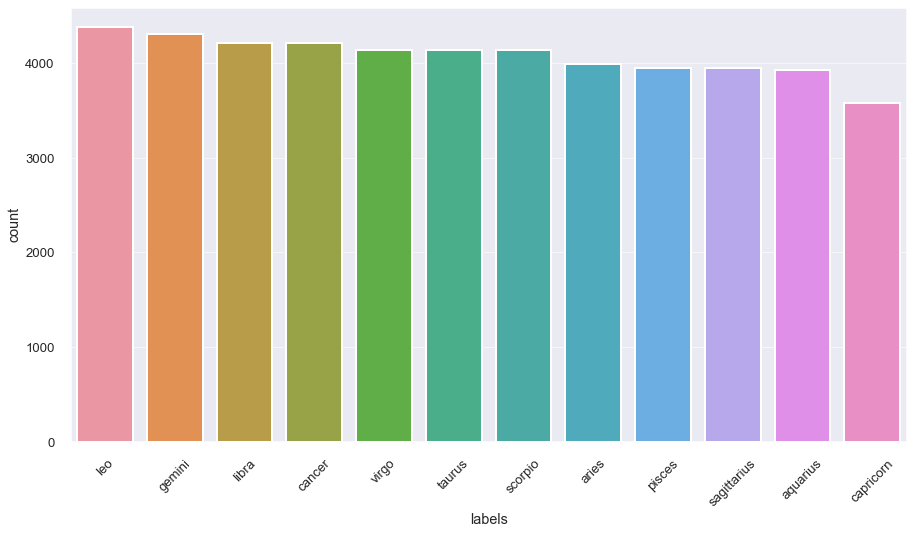

In [65]:
fig, ax = plt.subplots()
# the size of A4 paper lanscape
fig.set_size_inches(15, 8)
sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.6})
sns.countplot(x = profiles_df['labels'], order=profiles_df['labels'].value_counts(ascending=False).index, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Count of Zodiac Signs')
plt.savefig('zod_labels.png')
plt.show()

The plot indicates that the classes are balanced.